In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the file

Saving GSE44076_gene_expression_renamed.csv to GSE44076_gene_expression_renamed.csv


In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the file

Saving GSE8671_gene_expression_renamed.csv to GSE8671_gene_expression_renamed.csv


In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the file

Saving ML_DEG_dataset.csv to ML_DEG_dataset.csv


In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the file

Saving GSE21815_gene_expression_renamed.csv to GSE21815_gene_expression_renamed.csv


In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the file

Saving GSE106582_gene_expression_renamed.csv to GSE106582_gene_expression_renamed.csv


# Final Selected Model

# GSE106582

# GSE21815

# Area Under the Receiver Operating Characteristic curve

# AUC-ROC Curve Of MI Feature Selection ---Selected Feature

# GSE44076

# 82 Dataset

Evaluating Logistic Regression...
Logistic Regression Training Accuracy: 93.02%
Logistic Regression Testing Accuracy: 96.91%
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
MCC: 0.94
Confusion Matrix:
[[114   3]
 [  3  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       117
           1       0.96      0.96      0.96        77

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194

------------------------------------------------------------
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors Training Accuracy: 94.76%
K-Nearest Neighbors Testing Accuracy: 95.88%
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
MCC: 0.91
Confusion Matrix:
[[112   5]
 [  3  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       117
           1     

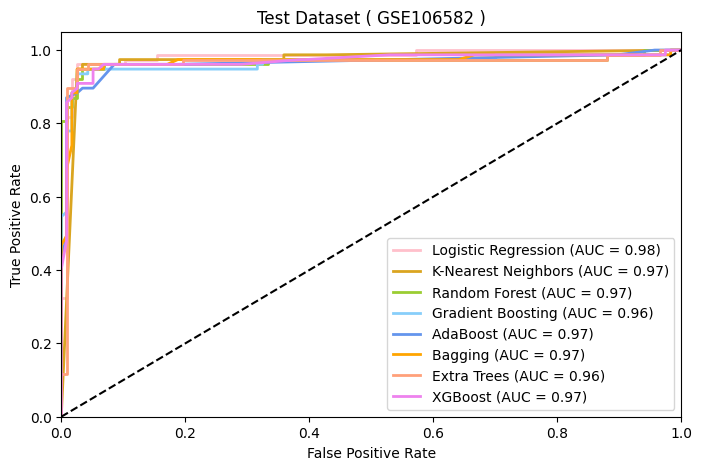

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

# Load training dataset
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B', 'CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A', 'target']
df_train = df_train[columns_of_interest]
#df_train = df_train.iloc[:, 1:]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]
X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

# Load test dataset
df_test = pd.read_csv("GSE106582_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

# Ensure common features in both train and test sets
common_cols = set(X_train.columns).intersection(X_test.columns)
X_train_common = X_train[list(common_cols)]
X_test_common = X_test[list(common_cols)]

# Define models with fixed colors
models = {
    'Logistic Regression': (LogisticRegression(C=0.01, max_iter=500, penalty='l2', solver='saga'), 'pink'),
'K-Nearest Neighbors': (KNeighborsClassifier(weights='distance',n_neighbors=4,metric='manhattan'), 'goldenrod'),
'Random Forest': (RandomForestClassifier(n_estimators=200, min_samples_split= 10, min_samples_leaf=1,max_features='log2', max_depth= 30), 'yellowgreen'),
'Gradient Boosting': (GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split= 5, n_estimators= 100, subsample= 0.8), 'lightskyblue'),
'AdaBoost': (AdaBoostClassifier(learning_rate= 0.1,n_estimators= 200), 'cornflowerblue'),
'Bagging': (BaggingClassifier(bootstrap=False, max_features= 0.5, max_samples= 0.5, n_estimators= 200), 'orange'),
'Extra Trees': (ExtraTreesClassifier(max_depth=20,max_features='sqrt', min_samples_leaf=1, min_samples_split= 2, n_estimators= 300), 'lightsalmon'),
'XGBoost': (XGBClassifier(colsample_bytree= 0.8,learning_rate= 0.01, max_depth= 3, n_estimators= 200, subsample= 1.0), 'violet')
}

# Initialize the plot with a compact figure size
plt.figure(figsize=(8, 5))

# Evaluate models
for name, (model, color) in models.items():
    print(f"Evaluating {name}...")

    # Cross-validation accuracy
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_common, y_train, cv=kfold, scoring='accuracy')
    print(f"{name} Training Accuracy: {cv_results.mean() * 100:.2f}%")

    # Train and test model
    model.fit(X_train_common, y_train)
    predictions = model.predict(X_test_common)

    # Get probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_common)[:, 1]
    else:
        probs = model.decision_function(X_test_common)

    # Compute AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Compute other metrics
    test_accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, predictions)

    print(f"{name} Testing Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"MCC: {mcc:.2f}")

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("-" * 60)

    # Plot ROC curve with manually assigned colors
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Dataset ( GSE106582 )')
plt.legend(loc='lower right')
plt.show()


# 15 Dataset

Evaluating Logistic Regression...
Logistic Regression Training Accuracy: 93.63%
Logistic Regression Testing Accuracy: 99.29%
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
MCC: 0.94
Confusion Matrix:
[[  8   1]
 [  0 132]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.99      1.00      1.00       132

    accuracy                           0.99       141
   macro avg       1.00      0.94      0.97       141
weighted avg       0.99      0.99      0.99       141

------------------------------------------------------------
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors Training Accuracy: 94.17%
K-Nearest Neighbors Testing Accuracy: 97.87%
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
MCC: 0.81
Confusion Matrix:
[[  6   3]
 [  0 132]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1     

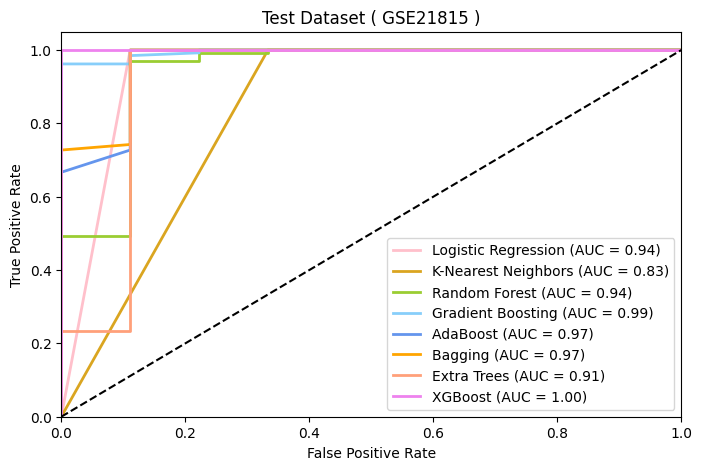

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

# Load training dataset
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B', 'CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A', 'target']
df_train = df_train[columns_of_interest]
#df_train = df_train.iloc[:, 1:]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]
X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

# Load test dataset
df_test = pd.read_csv("GSE21815_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

# Ensure common features in both train and test sets
common_cols = set(X_train.columns).intersection(X_test.columns)
X_train_common = X_train[list(common_cols)]
X_test_common = X_test[list(common_cols)]

# Define models with fixed colors
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), 'pink'),
'K-Nearest Neighbors': (KNeighborsClassifier(metric='euclidean', n_neighbors= 3, weights='distance'), 'goldenrod'),
'Random Forest': (RandomForestClassifier(max_depth=None,max_features= 'sqrt', min_samples_leaf=4, min_samples_split= 10, n_estimators= 200), 'yellowgreen'),
'Gradient Boosting': (GradientBoostingClassifier(learning_rate=0.01, max_depth= 5, min_samples_split= 2, n_estimators= 100, subsample= 0.8), 'lightskyblue'),
'AdaBoost': (AdaBoostClassifier(learning_rate=0.1, n_estimators= 200), 'cornflowerblue'),
'Bagging': (BaggingClassifier(bootstrap=True, max_features= 0.75, max_samples= 1.0, n_estimators= 200), 'orange'),
'Extra Trees': (ExtraTreesClassifier(max_depth=None,max_features= 'sqrt', min_samples_leaf= 4, min_samples_split=5, n_estimators= 300), 'lightsalmon'),
'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 'violet')
}

# Initialize the plot with a compact figure size
plt.figure(figsize=(8, 5))

# Evaluate models
for name, (model, color) in models.items():
    print(f"Evaluating {name}...")

    # Cross-validation accuracy
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_common, y_train, cv=kfold, scoring='accuracy')
    print(f"{name} Training Accuracy: {cv_results.mean() * 100:.2f}%")

    # Train and test model
    model.fit(X_train_common, y_train)
    predictions = model.predict(X_test_common)

    # Get probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_common)[:, 1]
    else:
        probs = model.decision_function(X_test_common)

    # Compute AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Compute other metrics
    test_accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, predictions)

    print(f"{name} Testing Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"MCC: {mcc:.2f}")

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("-" * 60)

    # Plot ROC curve with manually assigned colors
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Dataset ( GSE21815 )')
plt.legend(loc='lower right')
plt.show()

# GSE44076

In [ ]:
pip install xgboost

Evaluating Logistic Regression...
Logistic Regression Training Accuracy: 93.90%
Logistic Regression Testing Accuracy: 98.65%
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
MCC: 0.97
Confusion Matrix:
[[50  0]
 [ 2 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.98      0.99        98

    accuracy                           0.99       148
   macro avg       0.98      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148

------------------------------------------------------------
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors Training Accuracy: 93.91%
K-Nearest Neighbors Testing Accuracy: 98.65%
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
MCC: 0.97
Confusion Matrix:
[[49  1]
 [ 1 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.99  

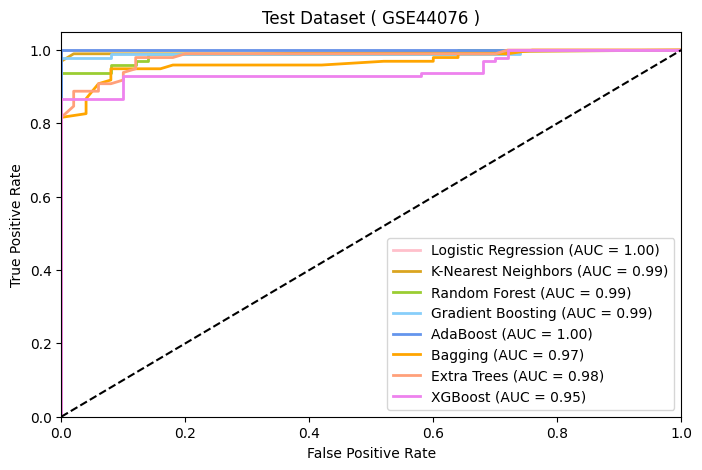

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

# Load training dataset
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B', 'CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A', 'target']
df_train = df_train[columns_of_interest]
#df_train = df_train.iloc[:, 1:]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]
X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

# Load test dataset
df_test = pd.read_csv("GSE44076_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

# Ensure common features in both train and test sets
common_cols = set(X_train.columns).intersection(X_test.columns)
X_train_common = X_train[list(common_cols)]
X_test_common = X_test[list(common_cols)]

# Define models with fixed colors
models = {
'Logistic Regression': (LogisticRegression(solver= 'saga', penalty='l1',max_iter= 5000, l1_ratio=0.5, C= np.float64(0.1668100537200059)), 'pink'),
'K-Nearest Neighbors': (KNeighborsClassifier(), 'goldenrod'),
'Random Forest': (RandomForestClassifier(n_estimators= 200,min_samples_split= 10, min_samples_leaf= 4, max_features='log2', max_depth=10), 'yellowgreen'),
'Gradient Boosting': (GradientBoostingClassifier(), 'lightskyblue'),
'AdaBoost': (AdaBoostClassifier(n_estimators= 250, learning_rate=np.float64(0.2575)), 'cornflowerblue'),
'Bagging': (BaggingClassifier(bootstrap=True, max_features=0.75, max_samples=0.5, n_estimators= 200), 'orange'),
'Extra Trees': (ExtraTreesClassifier(max_depth=None, max_features='sqrt', min_samples_leaf= 1, min_samples_split=2, n_estimators= 300), 'lightsalmon'),
'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 'violet')
}

# Initialize the plot with a compact figure size
plt.figure(figsize=(8, 5))

# Evaluate models
for name, (model, color) in models.items():
    print(f"Evaluating {name}...")

    # Cross-validation accuracy
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_common, y_train, cv=kfold, scoring='accuracy')
    print(f"{name} Training Accuracy: {cv_results.mean() * 100:.2f}%")

    # Train and test model
    model.fit(X_train_common, y_train)
    predictions = model.predict(X_test_common)

    # Get probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_common)[:, 1]
    else:
        probs = model.decision_function(X_test_common)

    # Compute AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Compute other metrics
    test_accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, predictions)

    print(f"{name} Testing Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"MCC: {mcc:.2f}")

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("-" * 60)

    # Plot ROC curve with manually assigned colors
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Dataset ( GSE44076 )')
plt.legend(loc='lower right')
plt.show()

# GSE8671

Evaluating Logistic Regression...
Logistic Regression Training Accuracy: 93.90%
Logistic Regression Testing Accuracy: 96.88%
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
MCC: 0.94
Confusion Matrix:
[[32  0]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.94      0.97        32

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64

------------------------------------------------------------
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors Training Accuracy: 94.76%
K-Nearest Neighbors Testing Accuracy: 95.31%
Precision: 0.96
Recall: 0.95
F1-Score: 0.95
MCC: 0.91
Confusion Matrix:
[[32  0]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00  

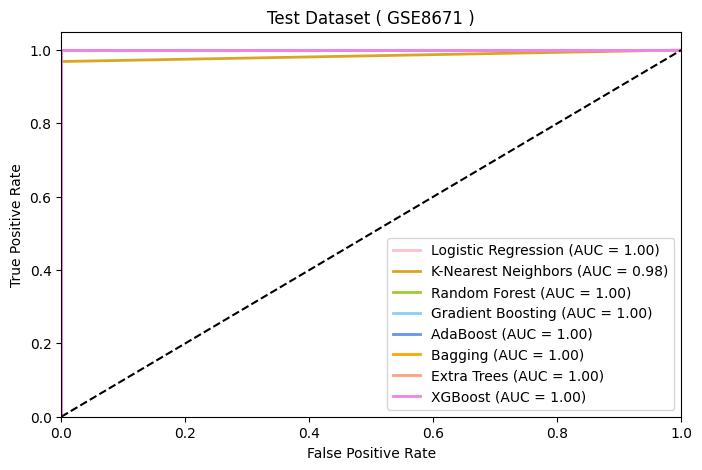

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

# Load training dataset
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B', 'CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A', 'target']
df_train = df_train[columns_of_interest]
#df_train = df_train.iloc[:, 1:]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]
X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

# Load test dataset
df_test = pd.read_csv("GSE8671_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

# Ensure common features in both train and test sets
common_cols = set(X_train.columns).intersection(X_test.columns)
X_train_common = X_train[list(common_cols)]
X_test_common = X_test[list(common_cols)]

# Define models with fixed colors
models = {
    'Logistic Regression': (LogisticRegression(solver='saga',penalty='l2', max_iter= 5000, l1_ratio= 1.0, C=np.float64(0.5994842503189409)), 'pink'),
'K-Nearest Neighbors': (KNeighborsClassifier(weights='distance', n_neighbors= 4, metric='euclidean'), 'goldenrod'),
'Random Forest': (RandomForestClassifier(n_estimators= 300, min_samples_split= 10, min_samples_leaf= 1, max_features='log2', max_depth= None), 'yellowgreen'),
'Gradient Boosting': (GradientBoostingClassifier(subsample= 0.6,n_estimators= 500, min_samples_split= 5, max_depth=5, learning_rate=np.float64(0.01)), 'lightskyblue'),
'AdaBoost': (AdaBoostClassifier(n_estimators=100, learning_rate= np.float64(0.505)), 'cornflowerblue'),
'Bagging': (BaggingClassifier(), 'orange'),
'Extra Trees': (ExtraTreesClassifier(max_depth= None, max_features='sqrt', min_samples_leaf=1, min_samples_split= 2, n_estimators=100), 'lightsalmon'),
'XGBoost': (XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth= 3, n_estimators= 100, subsample= 1.0), 'violet')
}

# Initialize the plot with a compact figure size
plt.figure(figsize=(8, 5))

# Evaluate models
for name, (model, color) in models.items():
    print(f"Evaluating {name}...")

    # Cross-validation accuracy
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_common, y_train, cv=kfold, scoring='accuracy')
    print(f"{name} Training Accuracy: {cv_results.mean() * 100:.2f}%")

    # Train and test model
    model.fit(X_train_common, y_train)
    predictions = model.predict(X_test_common)

    # Get probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_common)[:, 1]
    else:
        probs = model.decision_function(X_test_common)

    # Compute AUC-ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Compute other metrics
    test_accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, predictions)

    print(f"{name} Testing Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"MCC: {mcc:.2f}")

    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("-" * 60)

    # Plot ROC curve with manually assigned colors
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Dataset ( GSE8671 )')
plt.legend(loc='lower right')
plt.show()